# Números complexos

Neste notebook exploramos alguns aspectos dos números complexos. Especialmente, vamos falar da interferência entre duas ondas da mesma frequência. 

Vimos nas aulas passadas que uma função cossenoidal geral, expressa por:

\begin{equation}
x(t) = \mathrm{Re}\left\{A\mathrm{e}^{-\mathrm{j}\phi} \ \mathrm{e}^{\mathrm{j}\omega t}    \right\}
\end{equation}
em que $\tilde{A} = A\mathrm{e}^{-\mathrm{j}\phi}$ é a amplitude complexa do cosseno e contêm as informações de magnitude, $A$, e fase, $\phi$. Esta amplitude complexa pode ser representada no plano complexo por:


<div>
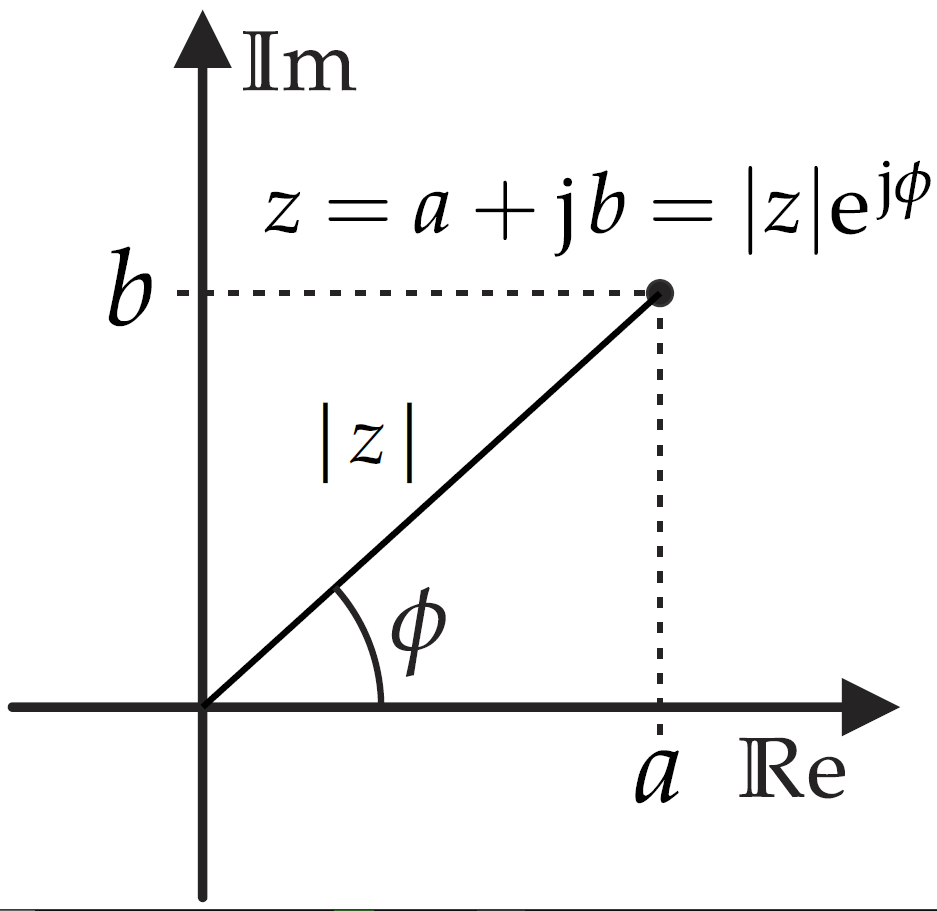
</div>

Imagine que temos duas ondas, ***de mesma frequência***, interferindo entre si. Queremos calcular a onda resultante. Então, podemos somá-las. Se cada uma das ondas é descrita por um número complexo $z_1$ e $z_2$, do tipo:

\begin{equation}
\tilde{z}_1 = a_1 + \mathrm{j} b_1 = |\tilde{z}_1| \mathrm{e}^{\mathrm{j}\phi_1}
\end{equation}

e

\begin{equation}
\tilde{z}_2 = a_2 + \mathrm{j} b_2 = |\tilde{z}_2| \mathrm{e}^{\mathrm{j}\phi_2}
\end{equation}

Vamos fazer algumas análises a seguir

In [1]:
# importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [10]:
# tempo e frequência
t = np.linspace(0, 2, 1000) # vetor temporal
freq = 2
w = 2*np.pi*freq

# onda 1
M1 = 1
phi_1 = np.deg2rad(0)
z1 = M1*np.exp(1j*phi_1)
xt1 = np.real(z1*np.exp(1j*w*t))

# onda 2
M2 = 1
phi_2 = np.deg2rad(-120)
z2 = M2*np.exp(1j*phi_2)
xt2 = np.real(z2*np.exp(1j*w*t))

print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print(r'A amplitude complexa de $x_1(t)$ é {}'.format(z1))
print(r'A amplitude complexa de $x_2(t)$ é {}'.format(z2))
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
A amplitude complexa de $x_1(t)$ é (1+0j)
A amplitude complexa de $x_2(t)$ é (-0.4999999999999998-0.8660254037844387j)
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


Temos agora 2 opções para calcular a onda resultante. A primeira é somar os sinais no domínio do tempo

\begin{equation}
x(t) = x_1(t) + x_2(t).
\end{equation}

A segunda é somar as amplitudes complexas

\begin{equation}
z = z_1 + z_2
\end{equation}
e então construir o sinal resultante $x(t) = \tilde{z}\mathrm{e}^{\mathrm{j}\omega t}$


A amplitude complexa de $x(t)$ é (0.5000000000000002-0.8660254037844387j)


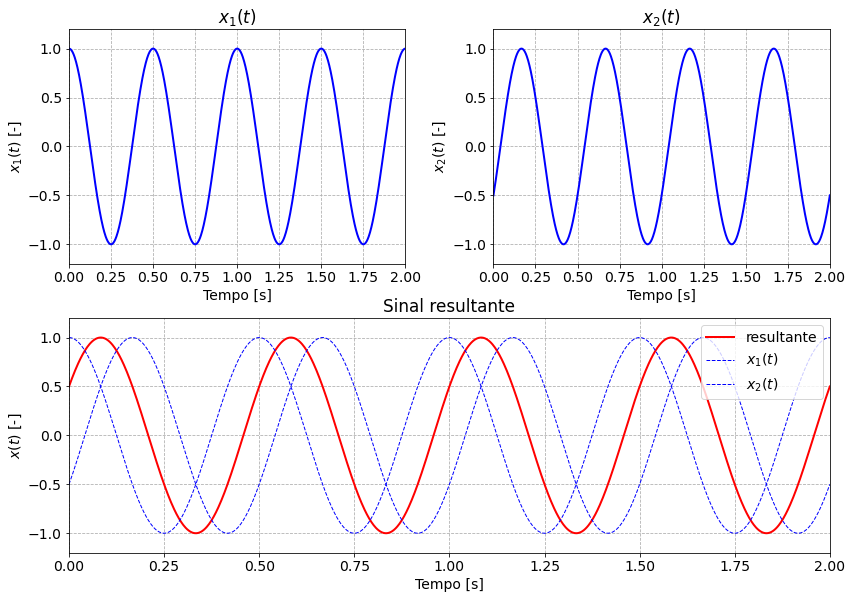

In [11]:
# Sinal resultante pela soma das amplitudes complexas
z = z1+z2
print(r'A amplitude complexa de $x(t)$ é {}'.format(z))
xt = np.real(z*np.exp(1j*w*t))

# Figura
plt.figure(figsize=(12,8))



plt.subplot(2,2,1)
plt.title(r'$x_1(t)$')
plt.plot(t, xt1, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x_1(t)$ [-]')
plt.ylim((-1.2*np.abs(z), 1.2*np.abs(z)))
plt.xlim((t[0], t[-1]))

plt.subplot(2,2,2)
plt.title(r'$x_2(t)$')
plt.plot(t, xt2, '-b', linewidth = 2)
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x_2(t)$ [-]')
plt.ylim((-1.2*np.abs(z), 1.2*np.abs(z)))
plt.xlim((t[0], t[-1]))
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('Sinal resultante')
plt.plot(t, xt, '-r', linewidth = 2, label = 'resultante')
plt.plot(t, xt1, '--b', linewidth = 1, label = r'$x_1(t)$')
plt.plot(t, xt2, '--b', linewidth = 1, label = r'$x_2(t)$')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel(r'$x(t)$ [-]')
plt.ylim((-1.2*np.abs(z), 1.2*np.abs(z)))
plt.xlim((t[0], t[-1]))


plt.show()


In [12]:
print(r'A amplitude complexa de $x(t)$ mag é {}'.format(np.abs(z)))

A amplitude complexa de $x(t)$ mag é 1.8027756377319948


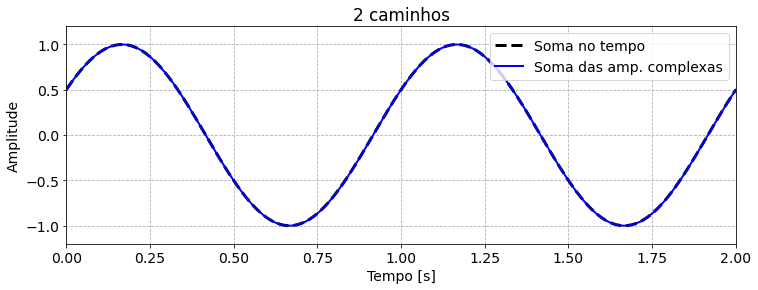

In [25]:
plt.figure(figsize=(12,4))
plt.title('2 caminhos')
plt.plot(t, xt1+xt2, '--k', linewidth = 3, label = 'Soma no tempo')
plt.plot(t, xt, 'b', linewidth = 2, label = 'Soma das amp. complexas')
#plt.plot(t, np.mean(xt1*xt2)*np.ones(len(t)), '--k', linewidth = 3, label = r'$<w(t)>$ [J/s]')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.ylim((-1.2*np.abs(z), 1.2*np.abs(z)))
plt.xlim((t[0], t[-1]));

(-2.0, 2.0)

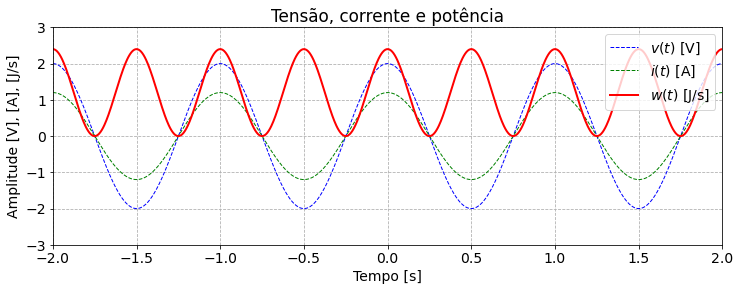

In [10]:
plt.figure(figsize=(12,4))
plt.title('Tensão, corrente e potência')
plt.plot(t, xt1, '--b', linewidth = 1, label = r'$v(t)$ [V]')
plt.plot(t, xt2, '--g', linewidth = 1, label = r'$i(t)$ [A]')
plt.plot(t, xt1*xt2, 'r', linewidth = 2, label = r'$w(t)$ [J/s]')
#plt.plot(t, np.mean(xt1*xt2)*np.ones(len(t)), '--k', linewidth = 3, label = r'$<w(t)>$ [J/s]')
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [V], [A], [J/s]')
plt.ylim((-3, 3))
plt.xlim((t[0], t[-1]))